In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import DBSCAN
from utils import *

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\z\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../../input/dataset.csv')
# sub = pd.read_csv('../../input/submission.csv')
df.head()

,WindNumber,Time,WindSpeed,Power,RotorSpeed
0,1,2017/11/1 0:20,4.188333,65.750000,5.779167
1,1,2017/11/1 0:30,4.042500,120.700000,8.636500
2,1,2017/11/1 0:40,4.137368,135.157895,8.668421
3,1,2017/11/1 0:50,4.274737,157.315789,8.727895
4,1,2017/11/1 1:00,4.108947,129.894737,8.656842


In [3]:
res = df.loc[df['WindNumber'] == 5, :]
df1 = res.drop_duplicates()
# df2 = df.loc[df['WindNumber'] == 2, :]
# df3 = df.loc[df['WindNumber'] == 3, :]
# df4 = df.loc[df['WindNumber'] == 4, :]
# df5 = df.loc[df['WindNumber'] == 5, :]
# df6 = df.loc[df['WindNumber'] == 6, :]
# df7 = df.loc[df['WindNumber'] == 7, :]
# df8 = df.loc[df['WindNumber'] == 8, :]
# df9 = df.loc[df['WindNumber'] == 9, :]
# df10 = df.loc[df['WindNumber'] == 10, :]
# df11 = df.loc[df['WindNumber'] == 11, :]
# df12 = df.loc[df['WindNumber'] == 12, :]
res.shape[0], df1.shape[0]

(50962, 50962)

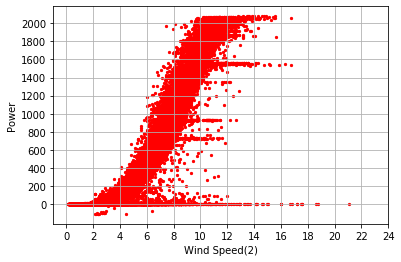

In [4]:
fig = plt.figure()
plt.scatter(df1['WindSpeed'], df1['Power'], s=5, c='r', cmap='viridis')
plt.xlabel('Wind Speed(2)')
plt.ylabel('Power')
plt.xticks(range(0, 26, 2))
plt.yticks(range(0, 2200, 200))
plt.grid()
plt.show()

In [5]:
df1['Power'].min(), df1['Power'].max()

(-109.53833329999999, 2078.3783329999997)

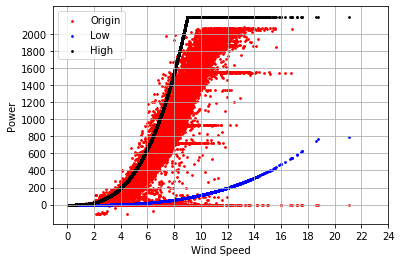

In [6]:
data = df1.copy()

data['low'] = data.apply(lambda x: low_limit(x['WindSpeed'], 3, 19, 22, 100.5, 2000, 0.05), axis=1)
data['high'] = data.apply(lambda x: high_limit(x['WindSpeed'], 100.5, 2200), axis=1)
# df1['low'].min(), df1['low'].max(), df1['high'].min(), df1['high'].max()

fig = plt.figure()
plt.scatter(data['WindSpeed'], data['Power'], s=3, c='r', cmap='viridis', label='Origin')
plt.scatter(data['WindSpeed'], data['low'], s=3, c='b', cmap='viridis', label='Low')
plt.scatter(data['WindSpeed'], data['high'], s=3, c='k', cmap='viridis', label='High')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.xticks(range(0, 26, 2))
plt.yticks(range(0, 2200, 200))
plt.grid()
plt.legend(loc='best')
plt.show()

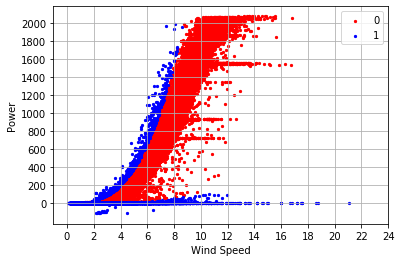

In [7]:
data['label'] = data.apply(lambda x: 0 if (x['Power'] > x['low']) and (x['Power'] < x['high']) else 1, axis=1)

fig = plt.figure()
data_0 = data.loc[data['label'] == 0, :]
data_1 = data.loc[data['label'] == 1, :]
plt.scatter(data_0['WindSpeed'], data_0['Power'], s=5, c='r', cmap='viridis', label='0')
plt.scatter(data_1['WindSpeed'], data_1['Power'], s=5, c='b', cmap='viridis', label='1')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.xticks(range(0, 26, 2))
plt.yticks(range(0, 2200, 200))
plt.grid()
plt.legend(loc='best')
plt.show()

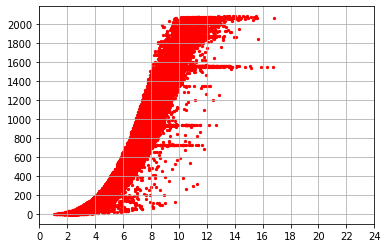

In [8]:
plt.figure()
plt.scatter(data_0['WindSpeed'], data_0['Power'], s=5, c='r', cmap='viridis', label='0')
plt.xticks(range(0, 26, 2))
plt.yticks(range(0, 2200, 200))
plt.grid()
plt.show()

1.063083164 16.78066667
30952


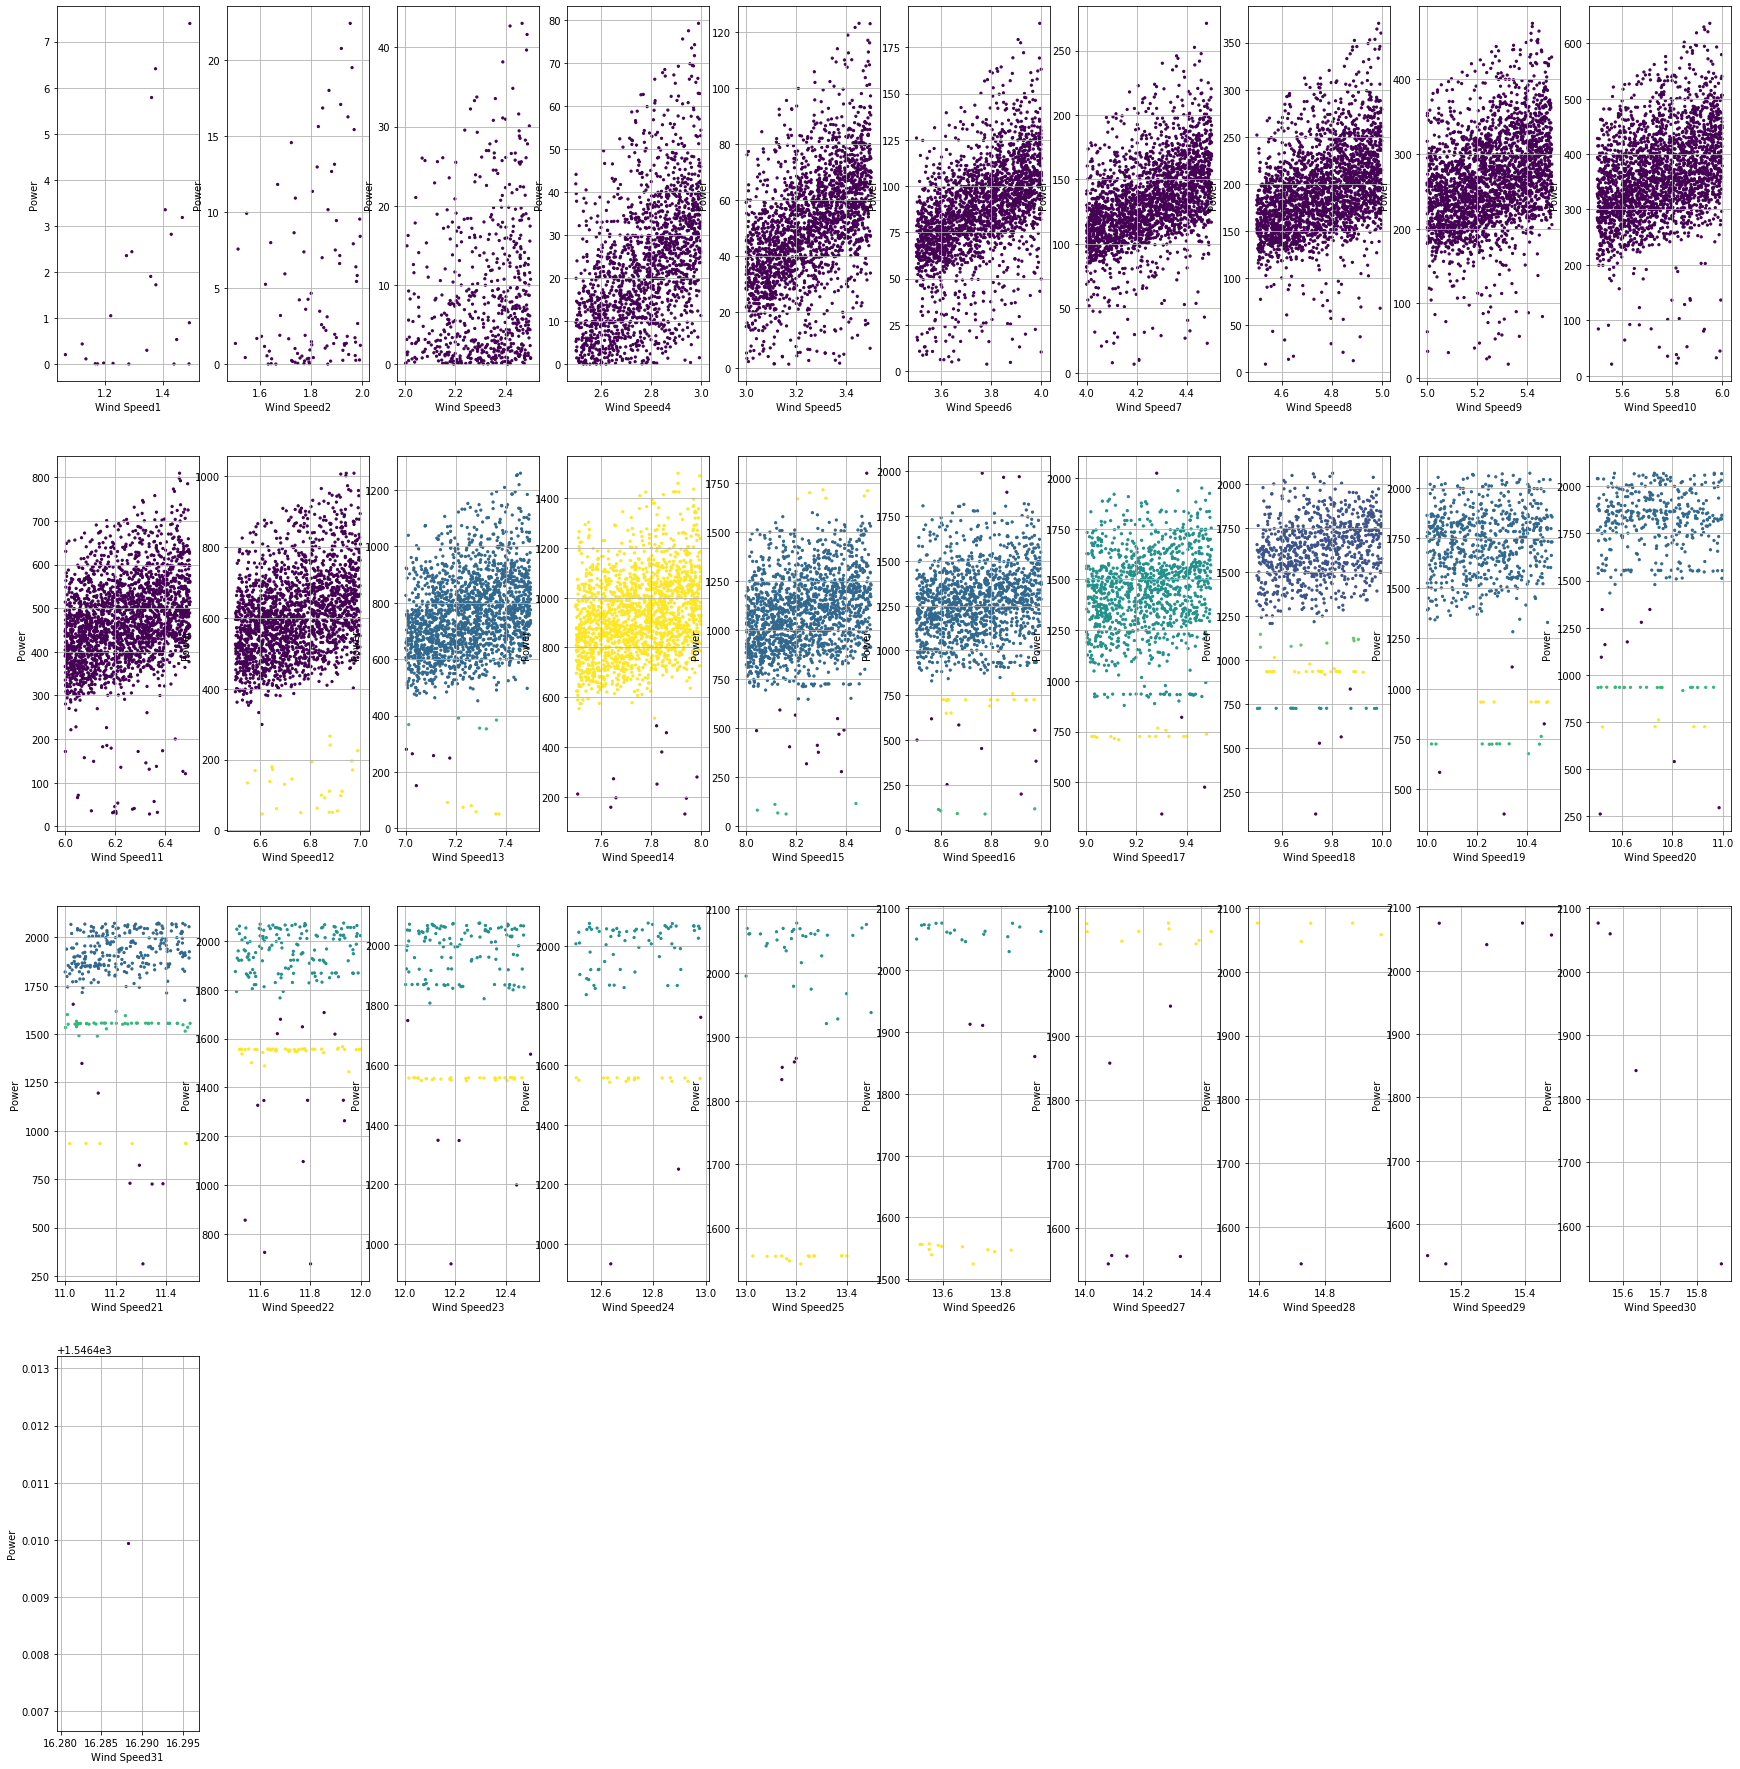

In [9]:
db_data = data_0.drop('label', axis=1).sort_values(by='WindSpeed').copy()
print(db_data['WindSpeed'].min(), db_data['WindSpeed'].max())
db_data['WindSpeed_bins'] = pd.cut(db_data['WindSpeed'], bins=list(np.arange(1, 17, 0.5)), labels=range(1, 32))

data3 = pd.DataFrame()
plt.figure(figsize=(30, 40))
for i in range(1, 32):
#     print('--------{}---------'.format(i))
    bin = db_data.loc[db_data['WindSpeed_bins'] == i, :]
    model = DBSCAN(eps=50, min_samples=5).fit(bin[['WindSpeed', 'Power']])
    # print('labels', i, np.unique(model.labels_))
    bin['label_3'] = model.labels_
    plt.subplot(5, 10, i)
    plt.scatter(bin['WindSpeed'], bin['Power'], s=5, c=bin['label_3'], cmap='viridis')
    plt.xlabel('Wind Speed{}'.format(i))
    plt.ylabel('Power')
    plt.grid()
    data3 = pd.concat([data3, bin], axis=0, ignore_index=True)
print(data3.shape[0])
plt.show()

1.063083164 16.78066667
30952


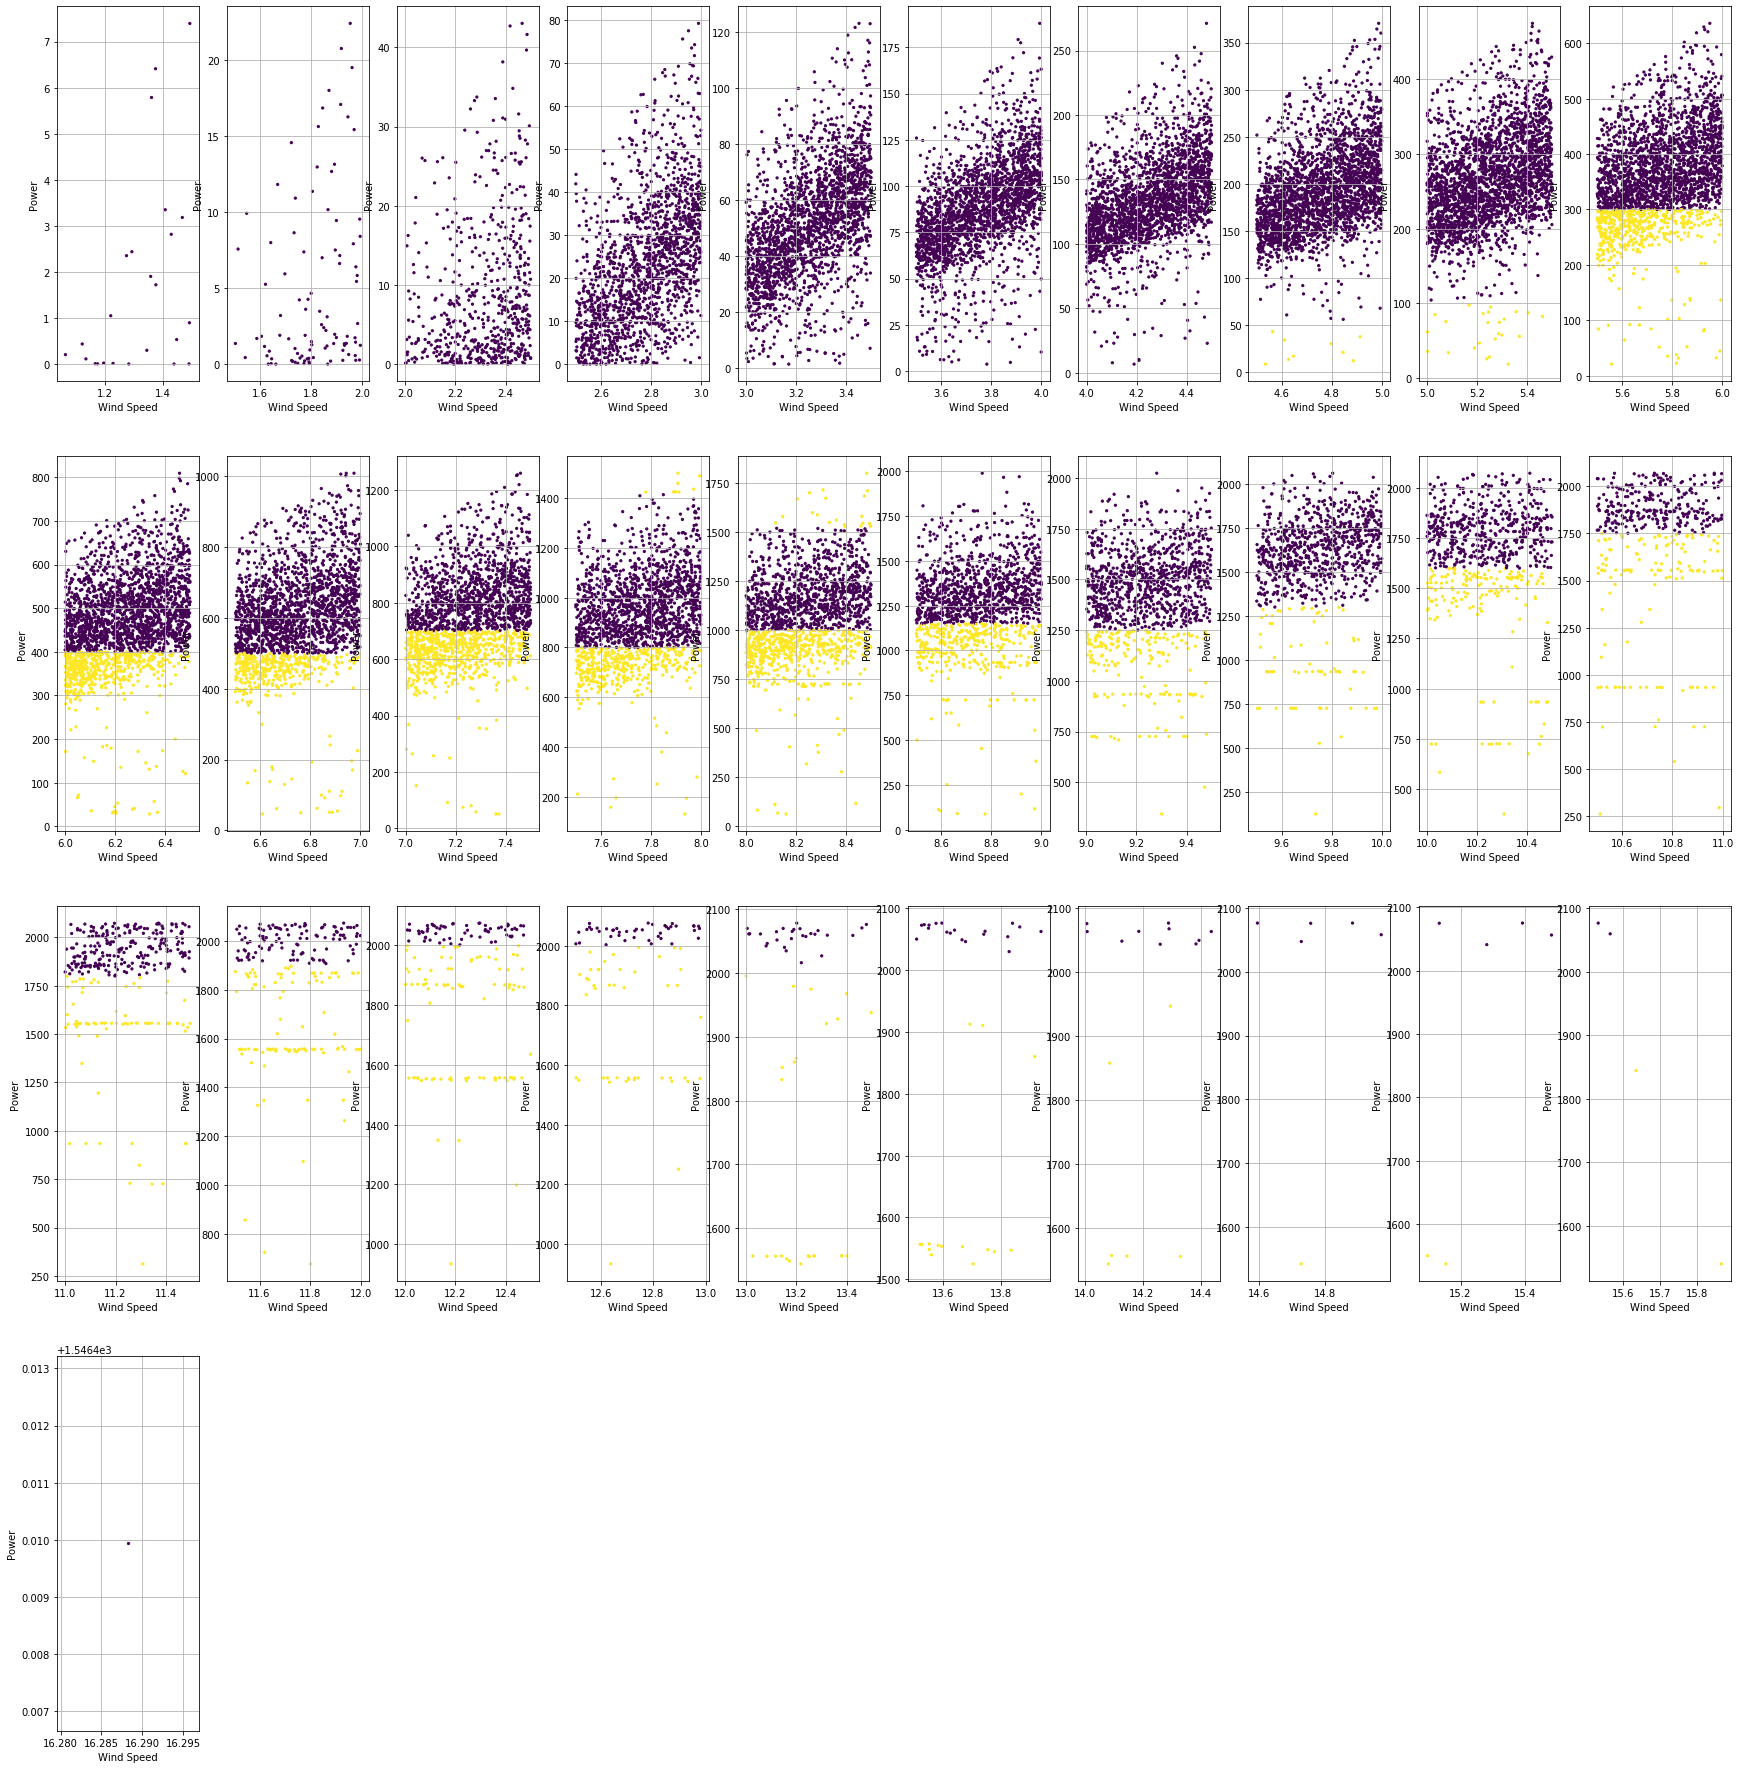

In [10]:
db_data = data_0.drop('label', axis=1).sort_values(by='WindSpeed').copy()
print(db_data['WindSpeed'].min(), db_data['WindSpeed'].max())
db_data['WindSpeed_bins'] = pd.cut(db_data['WindSpeed'], bins=list(np.arange(1, 17, 0.5)), labels=range(1, 32))

data3 = pd.DataFrame()
plt.figure(figsize=(30, 40))
for i in range(1, 32):
    # print('--------{}---------'.format(i))
    bin = db_data.loc[db_data['WindSpeed_bins'] == i, :]
    model = DBSCAN(eps=50, min_samples=5).fit(bin[['WindSpeed', 'Power']])
    # print('labels', i, np.unique(model.labels_))
    if i in [8]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 50 or x > 600 else 0)
    elif i in [9]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 100 or x > 700 else 0)
    elif i in [10]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 300 or x > 800 else 0)
    elif i in [11]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 400 or x > 1000 else 0)
    elif i in [12]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 500 or x > 1180 else 0)
    elif i in [13]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 700 or x > 1400 else 0)
    elif i in [14]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 800 or x > 1420 else 0)
    elif i in [15]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 1000 or x > 1520 else 0)
    elif i in [16]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 1150 else 0)
    elif i in [17]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 1250 else 0)
    elif i in [18]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 1300 else 0)
    elif i in [19]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 1600 else 0)
    elif i in [20]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 1750 else 0)
    elif i in [21]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 1800 else 0)
    elif i in [22]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 1900 else 0)
    elif i in list(range(23, 35)) + [36]:
        bin['label_3'] = bin['Power'].apply(lambda x: 1 if x < 2000 else 0)
    else:
        bin['label_3'] = 0
    plt.subplot(5, 10, i)
    plt.scatter(bin['WindSpeed'], bin['Power'], s=5, c=bin['label_3'], cmap='viridis')
    plt.xlabel('Wind Speed')
    plt.ylabel('Power')
    plt.grid()
    data3 = pd.concat([data3, bin], axis=0, ignore_index=True)

print(data3.shape[0])
plt.show()

In [11]:
data = pd.merge(data, data3, on=['WindNumber', 'Time', 'WindSpeed', 'Power', 'RotorSpeed'], how='left')
data['label'] = data.apply(lambda x: 1 if x['label'] == 1 or x['label_3'] == 1 else 0, axis=1)
data.drop(['label_3'], axis=1, inplace=True)
data.shape[0]

50962

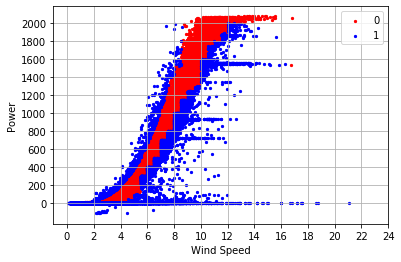

In [12]:
fig = plt.figure()
data_0 = data.loc[data['label'] == 0, :]
data_1 = data.loc[data['label'] == 1, :]
plt.scatter(data_0['WindSpeed'], data_0['Power'], s=5, c='r', cmap='viridis', label='0')
plt.scatter(data_1['WindSpeed'], data_1['Power'], s=5, c='b', cmap='viridis', label='1')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.xticks(range(0, 26, 2))
plt.yticks(range(0, 2200, 200))
plt.grid()
plt.legend(loc='best')
plt.show()

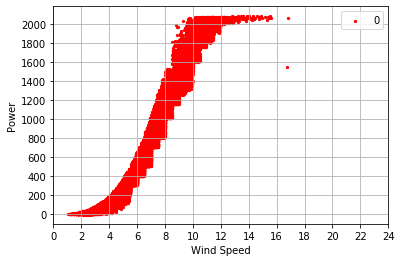

In [13]:
fig = plt.figure()
plt.scatter(data_0['WindSpeed'], data_0['Power'], s=5, c='r', cmap='viridis', label='0')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.xticks(range(0, 26, 2))
plt.yticks(range(0, 2200, 200))
plt.grid()
plt.legend(loc='best')
plt.show()

In [14]:
res = res.merge(data, on=['WindNumber', 'Time', 'WindSpeed', 'Power', 'RotorSpeed'], how='left')
res[['WindNumber', 'Time', 'label']].to_csv('sub/WindNumber5.csv', index=False)
res.shape[0]

50962